In [1]:
# Helper functions
import re
import matplotlib.pyplot as plt
import numpy as np
framerate = 40.0

def grep(filename, pattern, print_out = False):
    matches = []
    for n,line in enumerate(open(filename)):
        if pattern in line:
            if print_out:
                print(line, n)
            matches.append(str(line))
    return matches

def grep_o(my_list, my_regex, match_idx = 0):
    regex = re.compile(my_regex)
    return [regex.findall(line)[match_idx] for line in my_list]
    
def get_timestamps(filename):
    matches = grep(filename, "GRAB_INFO_TIMESTAMP:")
    timestamps_str = grep_o(grep_o(matches, str("GRAB_INFO_TIMESTAMP.*")), str("[-+]?[0-9]+\.?[0-9]*"))
    timestamps_int = [round(float(timestamp)) for timestamp in timestamps_str]
    return np.array(timestamps_int)

def get_systemtimestamps(filename):
    matches = grep(filename, "GRAB_INFO_TIMESTAMP:")
    timestamps_str = grep_o(matches, str("\[[-+]?[0-9]+\.?[0-9]+\]"))
    timestamps_float = [float(timestamp[1:-1]) for timestamp in timestamps_str]
    return np.around(np.array(timestamps_float) * 10**9, decimals=1)


In [2]:
# Investigate camera 2 (Synched with the PTP server)
# f = open("cam2_log.log", "r")
matches = grep("cam2_log.log", "GRAB_INFO_TIMESTAMP:")
timestamps_str = grep_o(grep_o(matches, str("GRAB_INFO_TIMESTAMP.*")), str("[-+]?[0-9]+\.?[0-9]+"))

# Investigate camera 2 (Synched with the PTP server)
# f = open("cam2_log.log", "r")
filename = "cam2_log.log"
timestamps = get_timestamps(filename)
systemtimestamps = get_systemtimestamps(filename)
print(matches[0])
print("Camera Time: ", timestamps[0])
print("System Time: ", systemtimestamps[0])

print("Note the big offset between the camera and system time of ", timestamps[0] - systemtimestamps[0], "seconds")

[ INFO] [1546582607.869380176]: GRAB_INFO_TIMESTAMP: 2319873895558508032.000000

Camera Time:  2319873895558508032
System Time:  1.5465826078693804e+18
Note the big offset between the camera and system time of  7.732912876891277e+17 seconds


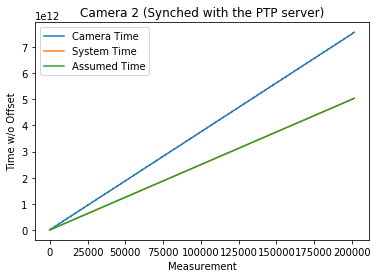

Note that the system and assumed time matches!!!!
The slope of the camera time compared to the system time is 1.5007177154212967


In [3]:
# Investigate camera 2 (Synched with the PTP server)
filename = "cam2_log.log"
fig, ax = plt.subplots()
# Plot the absolute camera timestamps w/o offset
timestamps = get_timestamps(filename)
timestamps = timestamps - np.min(timestamps)
ax.plot(timestamps, label='Camera Time')

# Plot the systemtime
systemtimestamps = get_systemtimestamps(filename)
systemtimestamps = systemtimestamps - np.min(systemtimestamps)
ax.plot(systemtimestamps, label='System Time')

# plot the assumed time based on the framerate
ax.plot(np.arange(0,len(timestamps))*(1/framerate * 10**9), label='Assumed Time')
plt.title("Camera 2 (Synched with the PTP server)")
plt.ylabel('Time w/o Offset')
plt.xlabel('Measurement')

legend = ax.legend(loc='upper left', shadow=False)
plt.show()

print("Note that the system and assumed time matches!!!!")
print("The slope of the camera time compared to the system time is", timestamps[-1] / systemtimestamps[-1])

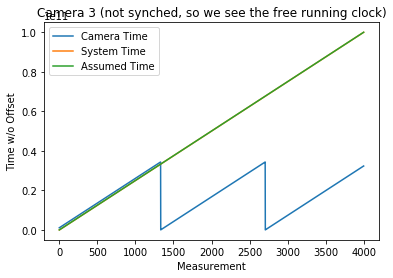

Note that the system and assumed time matches!!!!
The slope of the camera time compared to the system time is 1.0890557858676775


In [4]:
# Investigate camera 3 (not synched, so we see the free running clock)
filename = "cam3_log.log"
num_data = 4000

fig, ax = plt.subplots()
# Plot the absolute camera timestamps w/o offset
timestamps = get_timestamps(filename)
# timestamps = timestamps - np.min(timestamps)
ax.plot(timestamps[:num_data], label='Camera Time')

# Plot the systemtime
systemtimestamps = get_systemtimestamps(filename)
systemtimestamps = systemtimestamps - np.min(systemtimestamps)
ax.plot(systemtimestamps[:num_data], label='System Time')

# plot the assumed time based on the framerate
ax.plot(np.arange(0,num_data)*(1/framerate * 10**9), label='Assumed Time')
plt.title("Camera 3 (not synched, so we see the free running clock)")
plt.ylabel('Time w/o Offset')
plt.xlabel('Measurement')

legend = ax.legend(loc='upper left', shadow=False)
plt.show()

print("Note that the system and assumed time matches!!!!")
print("The slope of the camera time compared to the system time is", timestamps[500] / systemtimestamps[500])

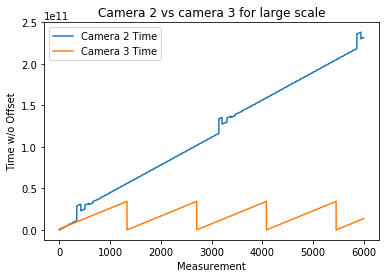

The camera time adjusts with a big step every ~3000 measurements, which are:  75.0  seconds


In [5]:
# Investigate camera 2 vs camera 3 for large scale
num_data = 6000

fig, ax = plt.subplots()
timestamps = get_timestamps("cam2_log.log")
ax.plot(timestamps[:num_data] - np.min(timestamps), label='Camera 2 Time')
timestamps = get_timestamps("cam3_log.log")
ax.plot(timestamps[:num_data], label='Camera 3 Time')
plt.title("Camera 2 vs camera 3 for large scale")
plt.ylabel('Time w/o Offset')
plt.xlabel('Measurement')

legend = ax.legend(loc='upper left', shadow=False)
plt.show()

print("The camera time adjusts with a big step every ~3000 measurements, which are: ", 3000 / framerate, " seconds")

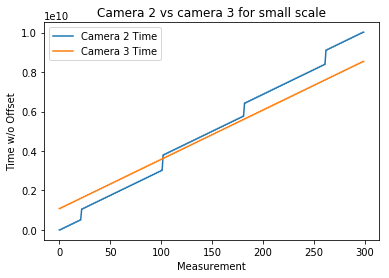

The camera time adjusts with small steps every ~180 measurements, which are:  4.5  seconds


In [6]:
# Investigate camera 2 vs camera 3 for small scale
num_data = 300

fig, ax = plt.subplots()
timestamps = get_timestamps("cam2_log.log")
ax.plot(timestamps[:num_data] - np.min(timestamps), label='Camera 2 Time')
timestamps = get_timestamps("cam3_log.log")
ax.plot(timestamps[:num_data], label='Camera 3 Time')
plt.title("Camera 2 vs camera 3 for small scale")
plt.ylabel('Time w/o Offset')
plt.xlabel('Measurement')

legend = ax.legend(loc='upper left', shadow=False)
plt.show()

print("The camera time adjusts with small steps every ~180 measurements, which are: ", 180 / framerate, " seconds")

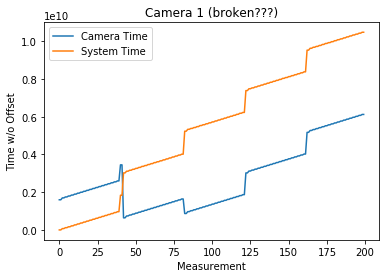

Camera seems to reset after 40 measurements which is  1.0  seconds


In [7]:
# Investigate camera 1 (broken???)
filename = "cam1_log.log"
num_data = 200

fig, ax = plt.subplots()
# Plot the absolute camera timestamps w/o offset
timestamps = get_timestamps(filename)
# timestamps = timestamps - np.min(timestamps)
ax.plot(timestamps[:num_data], label='Camera Time')

# Plot the systemtime
systemtimestamps = get_systemtimestamps(filename)
systemtimestamps = systemtimestamps - np.min(systemtimestamps)
ax.plot(systemtimestamps[:num_data], label='System Time')
plt.title("Camera 1 (broken???)")
plt.ylabel('Time w/o Offset')
plt.xlabel('Measurement')

legend = ax.legend(loc='upper left', shadow=False)
plt.show()

print("Camera seems to reset after 40 measurements which is ", 40 / framerate, " seconds")